<a href="https://colab.research.google.com/github/Vilasini-R/AIML-Lab-6/blob/main/Another_copy_of_AIML_III_Module_01_Lab_04_Transforming_data_using_linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforming data using linear algebra

Module 1, Lab 4

Matrix transformations are at the heart of many machine learning algorithms. In this lab, we'll visualize the effect of some simple transformations on a unit square and then visualize it using the MNIST dataset. We also see what data normalization means and how it can help in improving the accuracy of machine learning models.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
# You don't need to understand these functions

def plot_grid(transform, unit, linestyle=":", fig=None, ax=None):
    lim1 = -100
    lim2 = 100

    def mat2xy(start, end):
        if len(start.shape) == 1:
            start = np.expand_dims(start, 0)
            end = np.expand_dims(end, 0)
        nan = np.ones(len(start)) * np.nan
        x = np.stack((start[:, 0], end[:, 0], nan)).T.reshape(-1)
        y = np.stack((start[:, 1], end[:, 1], nan)).T.reshape(-1)
        return x, y

    def parallel_lines(axis, addend, lines, unit):
        addend = np.repeat(np.expand_dims(addend, 0), lines * 2, 0)
        unit = np.expand_dims(np.arange(-lines, lines) * unit, 1)
        unit = unit - lines
        addend = addend * unit
        lines = np.expand_dims(axis, 0) + addend
        return np.concatenate((lines, lines * -1))

    if fig is None:
        fig, ax = plt.subplots(figsize=(5, 5))
    transform = transform.astype(float)
    xaxis = transform[0]
    yaxis = transform[1]

    lines1 = parallel_lines(xaxis * lim1, yaxis, 100, unit)
    lines2 = parallel_lines(xaxis * lim2, yaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)

    x, y = mat2xy(xaxis * lim1, xaxis * lim2)
    plt.plot(x, y, linestyle, color="#440077")

    lines1 = parallel_lines(yaxis * lim1, xaxis, 100, unit)
    lines2 = parallel_lines(yaxis * lim2, xaxis, 100, unit)
    x, y = mat2xy(lines1, lines2)
    plt.plot(x, y, linestyle + "k", linewidth=0.5)

    x, y = mat2xy(yaxis * lim1, yaxis * lim2)
    plt.plot(x, y, linestyle, color="#aa5500")

    return fig, ax


def plot_data(features, labels, xlabel="Feature 1", ylabel="Feature 2", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for label in range(n_classes):
        plt.scatter(features[labels == label, 0], features[labels == label, 1])
    plt.legend([str(i) for i in range(n_classes)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return fig, ax


## Matrix transformations on data

Note: This lab involves a lot of matrix operations. If you are not familiar with them, please go through the resources given in class before proceeding. You can also review Khan Academy's excellent linear algebra [resources](https://www.khanacademy.org/math/linear-algebra/matrix-transformations).

A 2D coordinate system is defined by its basis vectors, i and j. Any point in this 2D space can be represented as a linear combination of these basis vectors. For example, the point (a,b) can be represented as:

$$\begin{equation}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\} = a\left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\} + b\left\{  \begin{aligned}0 \\ 1 \end{aligned} \right\} = a\hat{i} + b\hat{j}
\end{equation}$$

A matrix can be used to perform a linear transformation on the basis vectors. The new basis vectors $\hat{i}$ and $\hat{j}$ are given by the product of the matrix and the basis vectors of the standard coordinate system.

In the standard coordinate system (Let us call it T0), the basis vectors are

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ 0 \end{aligned} \right\}
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 1\end{aligned} \right\} \end{equation}$$

We can use any two vectors as basis vectors for a new coordinate system as long as they are not colinear. For example, let us call this new coordinate system T1:

$$\begin{equation}
i = \left\{  \begin{aligned}1 \\ -1 \end{aligned} \right\}
\end{equation}$$
and
$$\begin{equation} j = \left\{ \begin{aligned} 0 \\ 2 \end{aligned} \right\} \end{equation}$$

Suppose we have a point [a,b] in the T1 coordinate system. Its representation in the standard system T0 can be obtained by the following matrix multiplication:

$$ \begin{equation}
\left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} =
\left\{  \begin{aligned}&1 & 0 \\ -&1 & 2 \end{aligned} \right\}
\left\{  \begin{aligned}a \\ b \end{aligned} \right\}
\end{equation}$$
where the columns of the matrix are the basis vectors of T1.


Let us see this in action:


In [ ]:
T_original = np.array([[1, 0], [0, 1]])
T_transform = np.array([[1, 0], [-1, 2]])

data_transformed = np.array([5, 4])
data_original = np.matmul(T_transform, data_transformed)

print("Data in original coordinates = ", data_original)
print("Data in transformed coordinates = ", data_transformed)


Data in original coordinates =  [5 3]
Data in transformed coordinates =  [5 4]


We can visualize this below. T0 is shown with dotted lines and T1 is shown with solid lines.

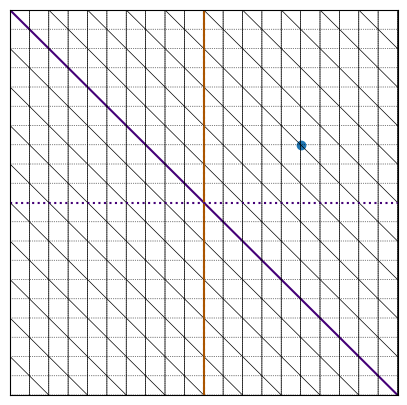

In [ ]:
fig, ax = plot_grid(T_transform.T, 1, "-")
plot_grid(T_original.T, 1, fig=fig, ax=ax)

plt.scatter(data_original[0], data_original[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()


Look at the coordinates of the blue dot. In T0 (dotted lines), the position is [5,3] where it is [5,4] in T1. Feel free to experiment with different data points and coordinate systems.

Remember that we can achieve the same thing by post-multiplying the transpose of the transformation matrix to the data. This will come in handy when transforming multiple data points at once:

In [ ]:
data_original_a = np.matmul(T_transform, data_transformed)
data_original_b = np.matmul(data_transformed, T_transform.T)
print(data_original_a)
print(data_original_b)


[5 3]
[5 3]


Why is transforming data useful? Data transformations cause the distance between data points to change. This will affect distance-based algorithms such as nearest neighbour

In [ ]:
point_A_transformed = np.array([3, 3])
point_B_transformed = np.array([2, -5])
point_C_transformed = np.array([1, -1])

point_A_original = np.matmul(T_transform, point_A_transformed)
point_B_original = np.matmul(T_transform, point_B_transformed)
point_C_original = np.matmul(T_transform, point_C_transformed)

def euclidean_distance(point1, point2):
    difference = point1 - point2
    squared_diff = difference * difference
    return np.sqrt(squared_diff.sum())

print("Distance between A and B in transformed = ", euclidean_distance(point_A_transformed, point_B_transformed))
print("Distance between B and C in transformed = ", euclidean_distance(point_B_transformed, point_C_transformed))
print("Distance between A and C in transformed = ", euclidean_distance(point_A_transformed, point_C_transformed))

print("")
print("Distance between A and B in original = ", euclidean_distance(point_A_original, point_B_original))
print("Distance between B and C in original = ", euclidean_distance(point_B_original, point_C_original))
print("Distance between A and C in original = ", euclidean_distance(point_A_original, point_C_original))


Distance between A and B in transformed =  8.06225774829855
Distance between B and C in transformed =  4.123105625617661
Distance between A and C in transformed =  4.47213595499958

Distance between A and B in original =  15.033296378372908
Distance between B and C in original =  9.055385138137417
Distance between A and C in original =  6.324555320336759


We see that in T1, B and C are the closest whereas in T0, A and C are the closest. These kinds of changes will affect the predictions returned by the nearest neighbour algorithm.

## Transformations on MNIST

Let us experiment with a subset of the MNIST dataset. We will extract two features from the database for our experiment. We will then transform the data using a transformation matrix and visualize the data in the new coordinate system. We will also see how normalization can help in improving the accuracy of the model. We will reuse previous labs code for this.

In [ ]:
def nearest_neighbor_single(train_data, train_labels, query_point):
    diff = train_data - query_point
    squared_diff = diff * diff
    distances = squared_diff.sum(1)
    label = train_labels[np.argmin(distances)]
    return label


def nearest_neighbor(train_data, train_labels, test_data):
    predicted_labels = np.array([nearest_neighbor_single(train_data, train_labels, query_point) for query_point in test_data])
    return predicted_labels


def compute_accuracy(true_labels, predicted_labels):
    assert len(true_labels) == len(predicted_labels), "Lengths of true and predicted labels should be the same"
    correct = (true_labels == predicted_labels).sum()
    return correct / len(true_labels)


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255
test_images = test_images / 255

n_classes = 4

train_images = train_images[train_labels < n_classes]
train_labels = train_labels[train_labels < n_classes]
test_images = test_images[test_labels < n_classes]
test_labels = test_labels[test_labels < n_classes]

train_images = train_images[::100].copy()
train_labels = train_labels[::100].copy()

test_images = test_images[::100].copy()
test_labels = test_labels[::100].copy()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def cumulative_array(image):
    img_cum = image.copy()
    for i in range(1, img_cum.shape[1]):
        img_cum[i, :] = img_cum[i, :] + img_cum[i - 1, :]
    img_cum = img_cum > 0
    return img_cum

def get_hole_pixels(image):
    im1 = cumulative_array(image)
    im2 = np.rot90(cumulative_array(np.rot90(image)), 3)
    im3 = np.rot90(cumulative_array(np.rot90(image, 2)), 2)
    im4 = np.rot90(cumulative_array(np.rot90(image, 3)), 1)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(image > 0)
    return hole

def get_boundary_pixels(image):
    image = image.copy() > 0
    rshift = np.roll(image, 1, 1)
    lshift = np.roll(image, -1, 1)
    ushift = np.roll(image, -1, 0)
    dshift = np.roll(image, 1, 0)
    boundary = (image & ~rshift) | (image & ~lshift) | (image & ~ushift) | (image & ~dshift)
    return boundary

train_holes = np.array([get_hole_pixels(img).sum() for img in train_images])
test_holes = np.array([get_hole_pixels(img).sum() for img in test_images])
train_boundaries = np.array([get_boundary_pixels(img).sum() for img in train_images])
test_boundaries = np.array([get_boundary_pixels(img).sum() for img in test_images])

train_features = np.vstack((train_holes, train_boundaries)).transpose()
test_features = np.vstack((test_holes, test_boundaries)).transpose()


Let us plot the samples and see what they look like:

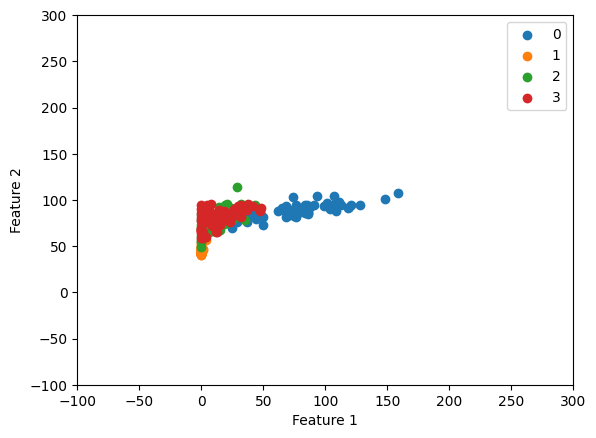

In [ ]:
xlim = [-100, 300]
ylim = [-100, 300]
fig, ax = plot_data(train_features, train_labels)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()


Check the baseline accuracy on the test set:

In [ ]:
test_predictions = nearest_neighbor(train_features, train_labels, test_features)
accuracy = compute_accuracy(test_labels, test_predictions)
print("Baseline accuracy:", accuracy * 100, "%", "for", n_classes, "classes")


Baseline accuracy: 76.19047619047619 % for 4 classes


Let us try transforming the features and checking their accuracy. The intuition to using the transformation matrix is to find the basis vectors of the dataset and transform the data to a new coordinate system where the basis vectors are orthogonal. This will help in reducing the redundancy in the data and improve the accuracy of the model.

In [ ]:
transformation_matrix = np.array([[0.5, -0.5], [0, 2.5]])
print(transformation_matrix)

train_features_transformed = np.matmul(train_features, transformation_matrix)
test_features_transformed = np.matmul(test_features, transformation_matrix)


[[ 0.5 -0.5]
 [ 0.   2.5]]


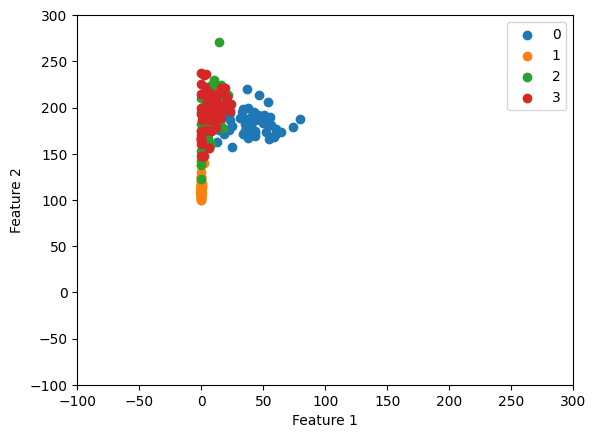

In [ ]:
fig, ax = plot_data(train_features_transformed, train_labels)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()


In [ ]:
test_predictions_transformed = nearest_neighbor(train_features_transformed, train_labels, test_features_transformed)
accuracy_transformed = compute_accuracy(test_labels, test_predictions_transformed)
print("Accuracy after transformation:", accuracy_transformed * 100, "%", "for", n_classes, "classes")


Accuracy after transformation: 80.95238095238095 % for 4 classes


## Questions:
1. Experiment with different transformation matrices and check the accuracy
2. Will the same transform used for these two features also work for other features?

> Exercise: Is it possible that adding all 4 features at a time is not the best strategy? Can you think of a better combination of features that can help in improving the accuracy of the model? Maybe you can try adding 2 features at a time and see if that helps.

In [ ]:
def get_convex_hull_pixels(image):
    im1 = cumulative_array(image)
    im2 = np.rot90(cumulative_array(np.rot90(image)), 3)
    im3 = np.rot90(cumulative_array(np.rot90(image, 2)), 2)
    im4 = np.rot90(cumulative_array(np.rot90(image, 3)), 1)
    hull = im1 & im2 & im3 & im4
    return hull

train_convex_hull = np.array([get_convex_hull_pixels(img).sum() for img in train_images])
test_convex_hull = np.array([get_convex_hull_pixels(img).sum() for img in test_images])
train_pixel_sum = np.sum(train_images, axis=(1, 2)) / (28 * 28)
test_pixel_sum = np.sum(test_images, axis=(1, 2)) / (28 * 28)

feature_combinations = [
    (train_holes, train_boundaries),
    (train_holes, train_convex_hull),
    (train_holes, train_pixel_sum),
    (train_boundaries, train_convex_hull),
    (train_boundaries, train_pixel_sum),
    (train_convex_hull, train_pixel_sum)
]

for i, (feat1, feat2) in enumerate(feature_combinations):
    train_combined_features = np.vstack((feat1, feat2)).transpose()
    test_combined_features = np.vstack((test_holes, test_boundaries)).transpose()

    test_predictions_combined = nearest_neighbor(train_combined_features, train_labels, test_combined_features)
    accuracy_combined = compute_accuracy(test_labels, test_predictions_combined)
    print(f"Accuracy for combination {i+1}: {accuracy_combined * 100}%")


Accuracy for combination 1: 76.19047619047619%
Accuracy for combination 2: 28.57142857142857%
Accuracy for combination 3: 28.57142857142857%
Accuracy for combination 4: 28.57142857142857%
Accuracy for combination 5: 35.714285714285715%
Accuracy for combination 6: 28.57142857142857%


--------------------------------------------------------------------------------

1) Experiment with different transformation matrices and check the accuracy

[[4.5 1.5]
 [4.  2.5]]
Accuracy after first transformation = 0.6904761904761905


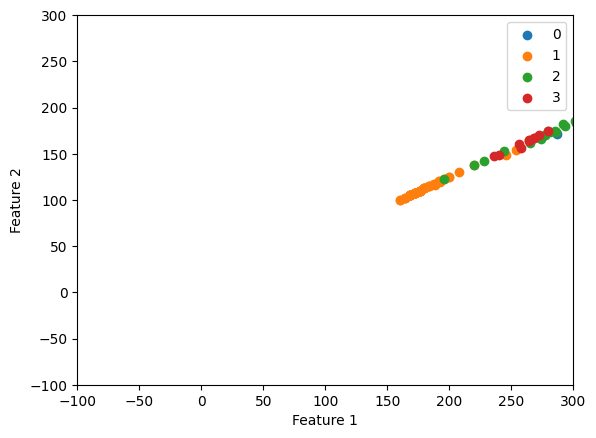

In [ ]:
transformation_matrix_1 = np.array([[4.5, 1.5], [4, 2.5]])

train_features_transformed_1 = np.matmul(train_features, transformation_matrix_1)
test_features_transformed_1 = np.matmul(test_features, transformation_matrix_1)

print(transformation_matrix_1)
fig, ax = plot_data(train_features_transformed_1, train_labels)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

test_predictions_transformed_1 = nearest_neighbor(train_features_transformed_1, train_labels, test_features_transformed_1)
accuracy_transformed_1 = compute_accuracy(test_labels, test_predictions_transformed_1)
print('Accuracy after first transformation =', accuracy_transformed_1)


[[ 2.5 -1.5]
 [ 6.   3.5]]
Accuracy after second transformation = 0.7857142857142857


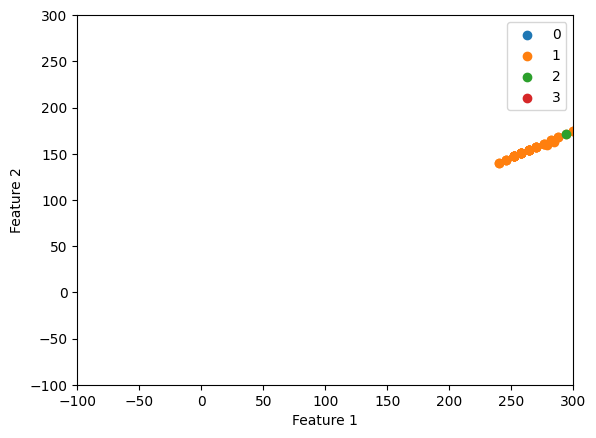

In [ ]:
transformation_matrix_2 = np.array([[2.5, -1.5], [6, 3.5]])

train_features_transformed_2 = np.matmul(train_features, transformation_matrix_2)
test_features_transformed_2 = np.matmul(test_features, transformation_matrix_2)

print(transformation_matrix_2)
fig, ax = plot_data(train_features_transformed_2, train_labels)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

test_predictions_transformed_2 = nearest_neighbor(train_features_transformed_2, train_labels, test_features_transformed_2)
accuracy_transformed_2 = compute_accuracy(test_labels, test_predictions_transformed_2)
print('Accuracy after second transformation =', accuracy_transformed_2)


________________________________________________________________________________

2) Will the same transform used for these two features also work for other features?

A: Not every time. Different features may not respond to the same transform depending on the characteristics and the task at hand. For example, a transform that works well for text data augmentation may not work well for image data augmentation.

-------------------------------------------------------------------------------

# Data normalization

Sometimes the features of our data have vastly different scales. This will cause the learning algorithm to give more importance to certain features, reducing its performance. Data normalization is a method in which we transform the features so that they have similar scales.

Three commonly used feature scaling techniques are rescaling, mean normalization and z-score normalization. Here, we will talk about the simplest one: rescaling.

$$\begin{equation}
x' = \frac {x -min(x)} { max(x) - min(x)}
\end{equation}$$



For more information, see [this page](https://towardsdatascience.com/data-normalization-in-machine-learning-395fdec69d02).

In [ ]:
def rescale_data(data):
    return (data - data.min()) / (data.max() - data.min())

We have to apply the rescaling to each feature individually. Also remember to apply the same transform we are using on the train set to the test set.

In [ ]:
train_features_rescaled_x = rescale_data(train_features[:, 0])
train_features_rescaled_y = rescale_data(train_features[:, 1])
train_features_rescaled = np.stack((train_features_rescaled_x, train_features_rescaled_y), axis=1)

test_features_rescaled_x = rescale_data(test_features[:, 0])
test_features_rescaled_y = rescale_data(test_features[:, 1])
test_features_rescaled = np.stack((test_features_rescaled_x, test_features_rescaled_y), axis=1)


Let us plot the rescaled features:

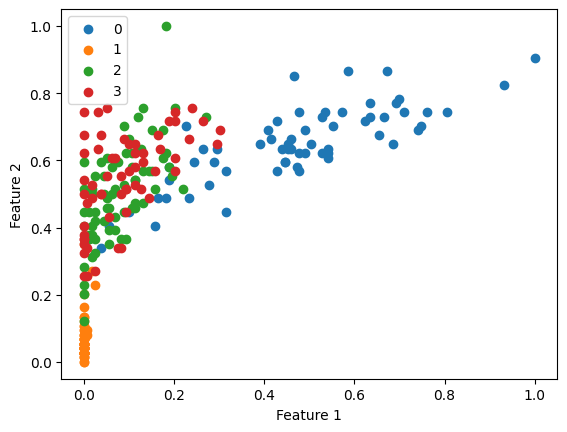

In [ ]:
fig, ax = plot_data(train_features_rescaled, train_labels)


This type of rescaling makes all the features between 0 and 1.

Let us calculate the accuracy obtained by this transform:

In [ ]:
test_predictions_rescaled = nearest_neighbor(train_features_rescaled, train_labels, test_features_rescaled)
accuracy_rescaled = compute_accuracy(test_labels, test_predictions_rescaled)
print("Accuracy after rescaling:", accuracy_rescaled * 100, "%")


Accuracy after rescaling: 80.95238095238095 %


All 2D linear transformations can be repreented by a transformation matrix. So what is the matrix associated with the rescaling function? Actually, we cannot represent rescaling with a matrix multiplication, because it is not a linear transform. Rescaling involves shifting the origin of the data, which is not allowed under linear transformations.

We can represent rescaling as a matrix multiplication followed by a vector addition. Let our first feature vector be called X and second feature vector be called Y. Suppose we want to rescale a data point [a,b]

$$ \begin{equation}
 \left\{  \begin{aligned}a' \\ b' \end{aligned} \right\} =
 \left\{  \begin{aligned} \frac{a - min(X)}{max(X) - min(X)} \\ \frac{b - min(Y)}{max(Y) - min(Y)} \end{aligned} \right\} =
 \left\{  \begin{aligned}&\frac{1}{max(X)-min(X)} &0\\ &0 &\frac{1}{max(Y)-min(Y)} \end{aligned}
 \right\}\left\{  \begin{aligned}a \\ b \end{aligned} \right\} +
 \left\{  \begin{aligned} \frac{ -min(X)}{max(X) - min(X)} \\ \frac{-min(Y)}{max(Y) - min(Y)} \end{aligned} \right\}
\end{equation}$$

You can verify this yourself if you wish, though it is not necessary.

